In [1]:
import numpy as np
import scipy
from scipy.interpolate import BSpline
from scipy.interpolate import _bspl

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

from colors_labels import *

In [2]:
import Corrfunc
from Corrfunc.io import read_lognormal_catalog, read_fortran_catalog
from Corrfunc.theory.DDsmu import DDsmu
from Corrfunc.theory.DD import DD
from Corrfunc.theory.xi import xi
from Corrfunc.utils import compute_amps
from Corrfunc.utils import evaluate_xi
from Corrfunc.utils import qq_analytic
from Corrfunc.bases import spline

In [3]:
colors = ['#332288', '#117733', '#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#AA4499', '#882255']*6

In [4]:
def distance(pointa, pointb):
    return np.linalg.norm(np.array(pointa)-np.array(pointb))

In [5]:
def circle(x, r):
    return np.sqrt(r**2 - x**2)

In [6]:
def rand_between(mymin, mymax, n=1):
    return np.random.rand(n)*(mymax-mymin) + mymin

In [ ]:
rmin = 0
rmax = 70
nbins = 7
#ncont = 300
#rcont = np.linspace(rmin, rmax, ncont)

[10. 20. 30. 40. 50. 60. 70.]


/Users/ksf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


Text(0, 0.5, 'r (h$^{-1}$ Mpc)')

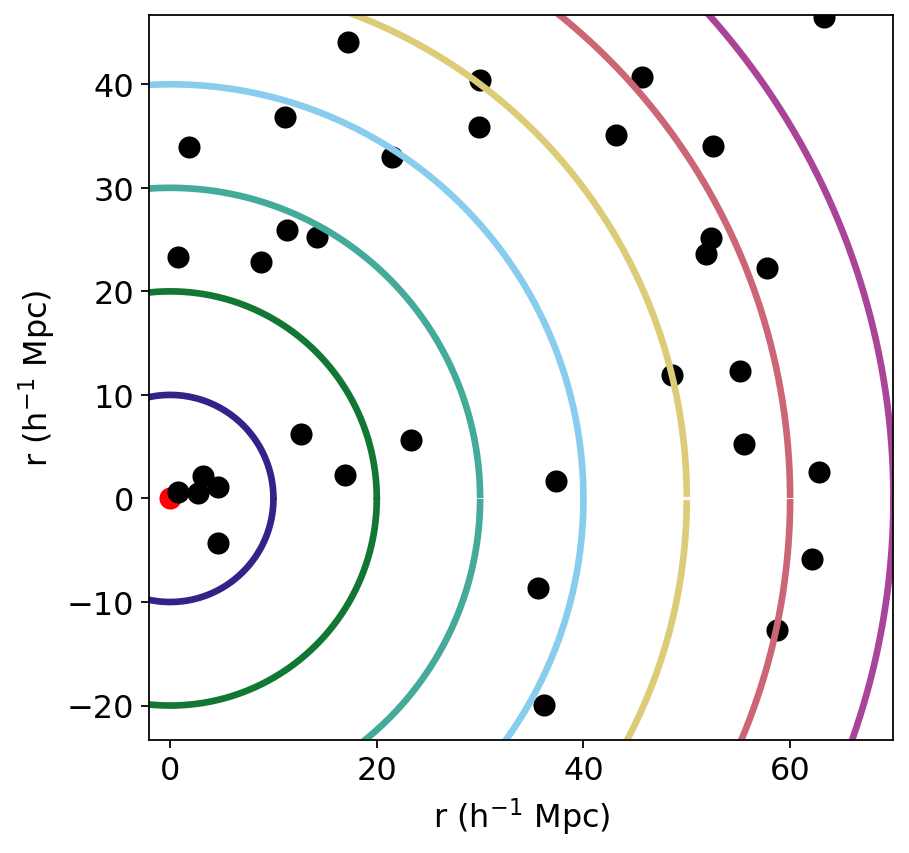

In [7]:
plt.figure(figsize=(6,6))
plt.axis('equal')
x = np.linspace(rmin-2, rmax, 30000)
rs = np.linspace(rmin, rmax, nbins+1)[1:]
print(rs)
for i in range(len(rs)):
    circ = circle(x, rs[i])
    plt.plot(np.concatenate((x, [rs[i]])), np.concatenate((circ, [0])), color=colors[i], lw=3)
    plt.plot(x, -circ, color=colors[i], lw=3)
    
marker = 'o'
col = 'k'
size = 80
n = 60
plt.scatter(0, 0, marker=marker, color='red', s=size)
xscat = rand_between(rmin, rmax, n)
yscat = rand_between(-rmax, rmax, n)

plt.scatter(xscat, yscat, marker=marker, color=col, s=size)
plt.xlim(min(x), rmax)
plt.ylim(-1/3*rmax, 2/3*rmax)

plt.xlabel(r'r (h$^{-1}$ Mpc)')
plt.ylabel(r'r (h$^{-1}$ Mpc)')

[36.05551275463989, 50.99019513592785]


/Users/ksf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


Text(0, 0.5, 'r (h$^{-1}$ Mpc)')

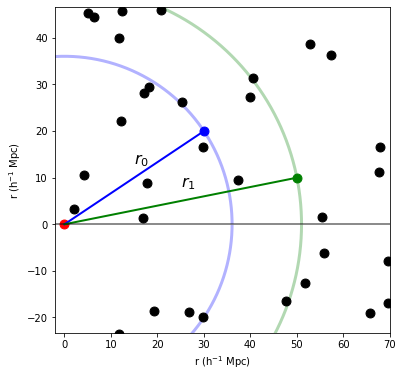

In [34]:
plt.figure(figsize=(6,6))
plt.axis('equal')
x = np.linspace(rmin-2, rmax, 30000)

marker = 'o'

gal_main = [0, 0]
plt.scatter(gal_main[0], gal_main[1], marker=marker, color='red', s=size)

gal1 = [30, 20]
col1 = 'blue'
plt.scatter(gal1[0], gal1[1], marker=marker, color=col1, s=size)
#rs = np.linspace(rmin, rmax, nbins+1)[1:]

gal2 = [50, 10]
col2 = 'green'
plt.scatter(gal2[0], gal2[1], marker=marker, color=col2, s=size)

#r1 = np.sqrt((gal_main[0]-gal1[0])**2 + (gal_main[1]-gal1[1])**2)\
#r2 = distance(gal_main, gal2)

gals = [gal1, gal2]
#rs = [r1, r2]
cols = [col1, col2]



print(rs)
circle_alpha = 0.3
for i in range(len(gals)):
    gal = gals[i]
    r = distance(gal_main, gal)
    
    circ = circle(x, rs[i])
    plt.plot(np.concatenate((x, [r])), np.concatenate((circ, [0])), color=cols[i], lw=3, zorder=0, alpha=circle_alpha)
    plt.plot(x, -circ, color=cols[i], lw=3, zorder=0, alpha=circle_alpha)
    
    plt.plot([gal_main[0], gal[0]], [gal_main[1], gal[1]], color=cols[i], linestyle='-', linewidth=2)
    
    plt.text(0.5*(gal_main[0] + gal[0]), 0.5*(gal_main[1] + gal[1])+ 3, r"$r_{}$".format(i), fontsize=16)

col = 'k'
size = 80
n = 60

xscat = rand_between(rmin, rmax, n)
yscat = rand_between(-rmax, rmax, n)

plt.scatter(xscat, yscat, marker=marker, color=col, s=size)
plt.xlim(min(x), rmax)
plt.ylim(-1/3*rmax, 2/3*rmax)

plt.axhline(0, color='k', alpha=0.6)

plt.xlabel(r'r (h$^{-1}$ Mpc)')
plt.ylabel(r'r (h$^{-1}$ Mpc)')

In [33]:
def plot_bases(bases, colors, names=None, rescale_by=None):
    plt.figure(figsize=(8,6))
    r = bases[:,0]
    nbases = len(bases[0])-1
    if names is None:
        names = [None]*nbases
    bases_ordered = [3,4,0,1,2]
    for i in bases_ordered:
        #norm = np.mean(bases[:,i])
        base = bases[:,i+1]
        if rescale_by is not None:
            base *= rescale_by[i]
        plt.plot(r, base, color=colors[i], label='{}'.format(names[i]), lw=2)
    if names is not None:
        leg = plt.legend()
        cb = leg._legend_box._children[-1]._children[0]
        for ib in cb._children:
            ib.align = "center"
            ax = plt.gca()

    plt.xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
    plt.ylabel('basis functions $f_k(r)$ (arbitrary units)')
    plt.ylim(-0.002, 0.005)
    plt.xlim(40, 150)

    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator())

## another attempt post-astrodata meeting

In [50]:
def galaxy_panel(ax):
    
    # settings
    marker = 'o'
    size=20
    col='blue'
    col_points = 'k'
    n = 200
    circle_alpha = 0.3

    # two main galaxies
    gal_main = [0, 0]
    ax.scatter(gal_main[0], gal_main[1], marker=marker, color=col_points, s=size)
    highlight = plt.Circle(gal_main, radius=1, fill=None, color=col)
    ax.add_artist(highlight)

    gal = [50, 20]
    ax.scatter(gal[0], gal[1], marker=marker, color='k', s=size)
    highlight = plt.Circle(gal, radius=1, fill=None, color=col)
    ax.add_artist(highlight)

    # circles and lines
    r = distance(gal_main, gal)
    x = np.linspace(rmin-2, rmax, 30000)
    circ = circle(x, r)
    ax.plot(np.concatenate((x, [r])), np.concatenate((circ, [0])), color=col, lw=3, zorder=0, alpha=circle_alpha)
    ax.plot(x, -circ, color=cols[i], lw=3, zorder=0, alpha=circle_alpha)
    ax.plot([gal_main[0], gal[0]], [gal_main[1], gal[1]], color=col, linestyle='-', linewidth=2)
    ax.text(0.5*(gal_main[0] + gal[0]), 0.5*(gal_main[1] + gal[1])+ 3, "$r$", fontsize=16)

    # all points
    xscat = rand_between(rmin, rmax, n)
    yscat = rand_between(-rmax, rmax, n)
    ax.scatter(xscat, yscat, marker=marker, color=col_points, s=size)

    # plot properties
    ax.set_xlim(min(x), rmax)
    ax.set_ylim(-1/3*rmax, 2/3*rmax)
    ax.axhline(0, color=col_points, alpha=0.6)
    ax.set_xlabel(r'r (h$^{-1}$ Mpc)')
    ax.set_ylabel(r'r (h$^{-1}$ Mpc)')
    ax.set_aspect('equal')

In [68]:
def bao_bases(ax):
    boxsize = 750
    cat_tag = f'_L{boxsize}_n2e-4_z057_patchy'
    proj = 'baoiter'
    cosmo_name = 'b17'
    cf_tag = f"_{proj}_cosmo{cosmo_name}_convtest"
    redshift = 0.57
    bias = 2.0

    rmin=36.0
    rmax=200.0

    rescale_by = np.ones(5)
    rescale_by[4] = 0.1
    
    projfn_start = f"../tables/bases{cat_tag}{cf_tag}_r{rmin}-{rmax}_z{redshift}_bias{bias}.dat"
    print(projfn_start)
    
    bases = np.loadtxt(projfn_start)

    r = bases[:,0]
    nbases = len(bases[0])-1
    
    colors = bao_base_colors
    bases_ordered = [3,4,0,1,2]
    for i in bases_ordered:
        base = bases[:,i+1]
        if rescale_by is not None:
            base *= rescale_by[i]
        ax.plot(r, base, color=colors[i], lw=2)

    ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
    ax.set_ylabel('$f_k(r)$')
    ax.set_ylim(-0.002, 0.005)
    ax.set_xlim(40, 150)

    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

/Users/ksf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


../tables/bases_L750_n2e-4_z057_patchy_baoiter_cosmob17_convtest_r36.0-200.0_z0.57_bias2.0.dat


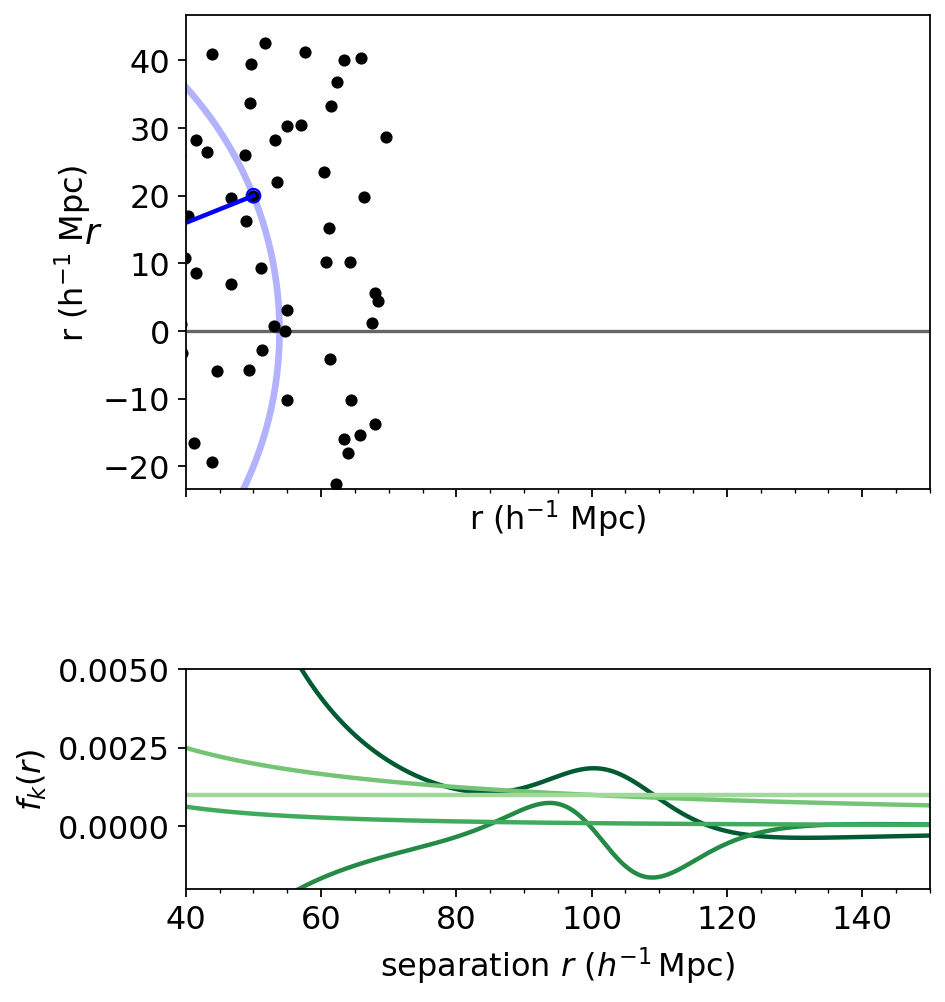

In [69]:
fig, axarr = plt.subplots(2,1, figsize=(6,8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
#plt.axis('equal')
galaxy_panel(axarr[0])
bao_bases(axarr[1])


In [43]:
plt.subplots

<function matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)>

## new lognormal data

In [7]:
realization = 0
boxsize = 750
cat_tag = f'_L{boxsize}_n2e-4_z057_patchy'
cat_fn = f'../catalogs/lognormal/cat{cat_tag}_lognormal_rlz{realization}.bin'

In [8]:
x, y, z = read_fortran_catalog(cat_fn)
#x, y, z = read_lognormal_catalog(n='3e-4')
boxsize = 750.0
nd = len(x)
print("Number of data points:",nd)

Number of data points: 85827


## spline basis

In [9]:
rmin = 0.0
rmax = 140.0
nprojbins = 16
ncont = 2000
r_edges = np.linspace(rmin, rmax, nprojbins+1)
r_fine = np.linspace(rmin, rmax, ncont)

nmubins = 1
mumax = 1.0

periodic = True
nthreads = 1

In [10]:
proj_type = 'generalr'
kwargs = {'order': 3} # 3: cubic spline
projfn = '../tables/cubic_spline.dat'
spline.write_bases(rmin, rmax, nprojbins, projfn, ncont=ncont, **kwargs)

'../tables/cubic_spline.dat'

In [11]:
dd_res, dd_proj, _ = DDsmu(1, nthreads, r_edges, mumax, nmubins, x, y, z, 
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, 
                           nprojbins=nprojbins, projfn=projfn)

In [12]:
volume = boxsize**3
rr_ana, qq_ana = qq_analytic(rmin, rmax, nd, volume, nprojbins, proj_type, projfn=projfn, rbins=r_edges)
numerator = dd_proj - rr_ana
amps_ana = np.linalg.solve(qq_ana, numerator)
xi_ana = evaluate_xi(amps_ana, r_fine, proj_type, projfn=projfn, rbins=r_edges)

Evaluating qq_analytic (Corrfunc/utils.py)
Evaluating xi (Corrfunc/utils.py)


In [74]:
def bases_panel(ax, bases, colors, rsep, rcolor, bases_ordered=None, rescale_by=None, xlim=(0, 140), ylim=None):

    bases = bases.copy()
    r = bases[:,0]
    nbases = len(bases[0])-1
    
    if bases_ordered is None:
        bases_ordered = np.arange(nbases)
    
    for i in bases_ordered:
        base = bases[:,i+1]
        if rescale_by is not None:
            base *= rescale_by[i]
        ax.plot(r, base, color=colors[i], lw=2)
        
        # plot intersection points with rsep line
        idx = (np.abs(r - rsep)).argmin()
        base_val = base[idx]
        if base_val!=0:
            ax.scatter(rsep, base_val, color=colors[i], marker='d', s=50,
                       edgecolor=rcolor, zorder=1000)#, markeredgewidth=0.5)
    
    ax.axvline(rsep, color=rcolor, alpha=0.3, ls='--', lw=3, zorder=0)
    ax.text(rsep-9, 0.7*ylim[1], r"$r_0$", fontsize=20)
        
    ax.axhline(0, color='grey', lw=0.8, zorder=0)
        
    ax.set_ylabel('$f_k(r)$')
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

In [75]:
def results_panel(ax, bases, colors, amps, r_fine, xi, bases_ordered=None, xlim=(0, 140), ylim=None):

    bases = bases.copy()
    r = bases[:,0]
    nbases = len(bases[0])-1
    
    if bases_ordered is None:
        bases_ordered = np.arange(nbases)
        
    for i in bases_ordered:
        base = bases[:,i+1]
        base *= amps[i]
        ax.plot(r, base, color=colors[i], lw=2)
        
    ax.plot(r_fine, xi, color='k', lw=3)
        
    ax.axhline(0, color='grey', lw=0.8, zorder=0)
    
    ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
    ax.set_ylabel(r'$a_k \, f_k(r), \,\,\, \xi(r)$')
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    #ax.xaxis.set_major_locator(plt.MaxNLocator(1))
    plt.locator_params(axis='y', nbins=3)
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

In [66]:
def data_panel(ax, data, zslice=(0,300), xlim=(0, 140), ylim=(0,70)):
    
    # settings
    marker = 'o'
    size=5
    col='blue'
    col_points = 'grey'
    alpha_points = 0.7
    n = 200
    circle_alpha = 0.3
    highlight_radius = 3

    # two main galaxies
    gal_main = [0, 0]
    ax.scatter(gal_main[0], gal_main[1], marker=marker, color=col_points, s=size, alpha=alpha_points)
    highlight = plt.Circle(gal_main, radius=highlight_radius, fill=None, color=col, lw=2)
    ax.add_artist(highlight)

    gal = [97, 40]
    ax.scatter(gal[0], gal[1], marker=marker, color=col_points, s=size, alpha=alpha_points)
    highlight = plt.Circle(gal, radius=highlight_radius, fill=None, color=col, lw=2)
    ax.add_artist(highlight)

    # circles and lines
    r = distance(gal_main, gal)
    x = np.linspace(rmin-2, rmax, 30000)
    circ = circle(x, r)
    ax.plot(np.concatenate((x, [r])), np.concatenate((circ, [0])), color=col, lw=3, zorder=0, alpha=circle_alpha)
    ax.plot(x, -circ, color=col, lw=3, zorder=0, alpha=circle_alpha)
    ax.plot([gal_main[0], gal[0]], [gal_main[1], gal[1]], color=col, linestyle='-', linewidth=2)
    ax.text(0.5*(gal_main[0] + gal[0]), 0.5*(gal_main[1] + gal[1])+5, r"$r_0$", fontsize=20)

    # all points
    in_slice = np.argwhere((zslice[0] <= data[2]) & (data[2] < zslice[1]))
    xdata = data[0][in_slice]
    ydata = data[1][in_slice]
    ax.scatter(xdata, ydata, marker=marker, color=col_points, s=size, alpha=alpha_points)

    ax.set_ylabel(r'separation $r$ ($h^{-1}\,$Mpc)')
    ax.set(xlim=xlim, ylim=ylim, aspect=1)
    ax.set(adjustable="box")
    
    return r, col

/Users/ksf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


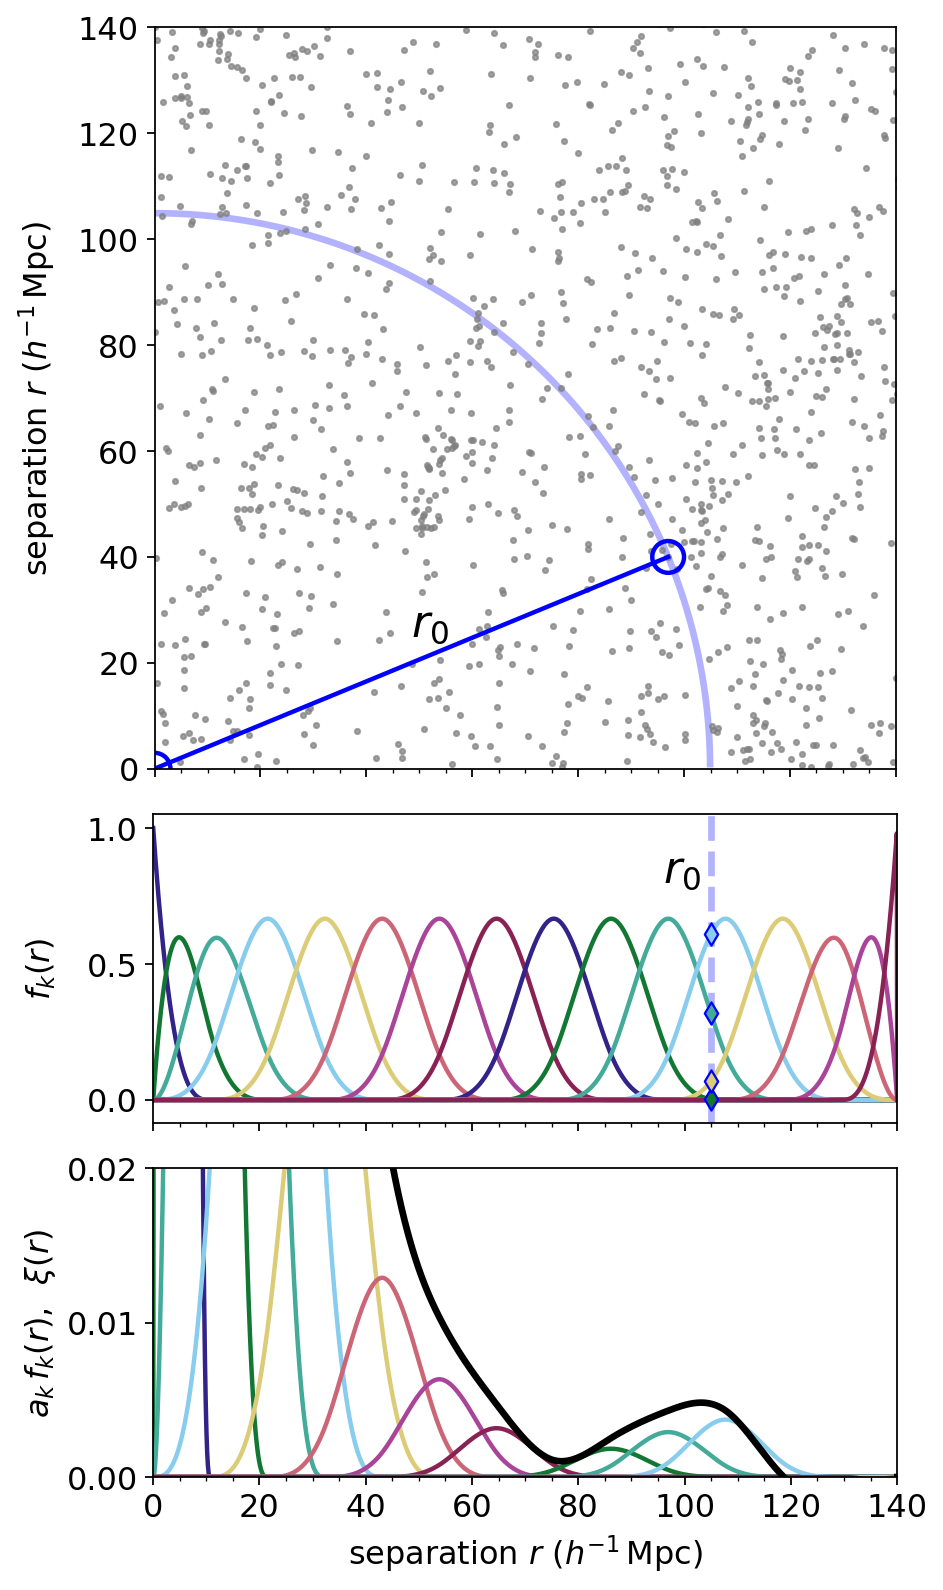

In [18]:
fig, axarr = plt.subplots(3,1, figsize=(6,12), sharex=True, gridspec_kw={'height_ratios': [2.4, 1, 1]})
plt.subplots_adjust(wspace=0.1, hspace=0.1)

data = [x, y, z]
bases = np.loadtxt(projfn)

rsep, rcolor = data_panel(axarr[0], data)
bases_panel(axarr[1], bases, colors, rsep, rcolor)
results_panel(axarr[2], bases, colors, amps_ana, xi_ana, ylim=(-0.05, 0.02))
fig.align_ylabels(axarr)

## BAO basis

In [12]:
import bao_utils
from Corrfunc.bases import bao

In [13]:
boxsize = 750
cat_tag = f'_L{boxsize}_n2e-4_z057_patchy'

proj = 'baoiter'
cosmo_name = 'b17'
cf_tag = f"_{proj}_cosmo{cosmo_name}_convtest"
redshift = 0.57
bias = 2.0

rmin=0.01 #issues with analytic solution for rmin=0
rmax=140.0

dalpha = 0.001
alpha_model_start = 1.0

projfn = f"../tables/bases{cat_tag}{cf_tag}_r{rmin}-{rmax}_z{redshift}_bias{bias}.dat"
cosmo = bao_utils.get_cosmo(cosmo_name)
kwargs = {'cosmo_base':cosmo, 'redshift':redshift, 'dalpha':dalpha, 'alpha_model':alpha_model_start, 'bias':bias}
nprojbins, _ = bao.write_bases(rmin, rmax, projfn, **kwargs)
print(projfn)

bases = np.loadtxt(projfn)

0.260448 0.31000013381653335 0.04814257203879415 0.676 0.96 [0.06] 0.8240000000000002 2.0328
bias: 2.0. dalpha: 0.001, alpha_model: 1.0
../tables/bases_L750_n2e-4_z057_patchy_baoiter_cosmob17_convtest_r0.01-140.0_z0.57_bias2.0.dat


In [14]:
ncont = 2000
r_edges = np.linspace(rmin, rmax, nprojbins+1)
r_fine = np.linspace(rmin, rmax, ncont)

nmubins = 1
mumax = 1.0

periodic = True
nthreads = 1

In [15]:
proj_type = 'generalr'

In [16]:
dd_res, dd_proj, _ = DDsmu(1, nthreads, r_edges, mumax, nmubins, x, y, z, 
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, 
                           nprojbins=nprojbins, projfn=projfn)

In [17]:
volume = boxsize**3
rr_ana, qq_ana = qq_analytic(rmin, rmax, nd, volume, nprojbins, proj_type, projfn=projfn, rbins=r_edges)
numerator = dd_proj - rr_ana
amps_ana = np.linalg.solve(qq_ana, numerator)
xi_ana = evaluate_xi(amps_ana, r_fine, proj_type, projfn=projfn, rbins=r_edges)

Evaluating qq_analytic (Corrfunc/utils.py)
Evaluating xi (Corrfunc/utils.py)


/Users/ksf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


3 0.001580245044193243
4 -0.0002949384919042307
0 9.075917962775613e-05
1 0.0009526761234950529
2 0.001


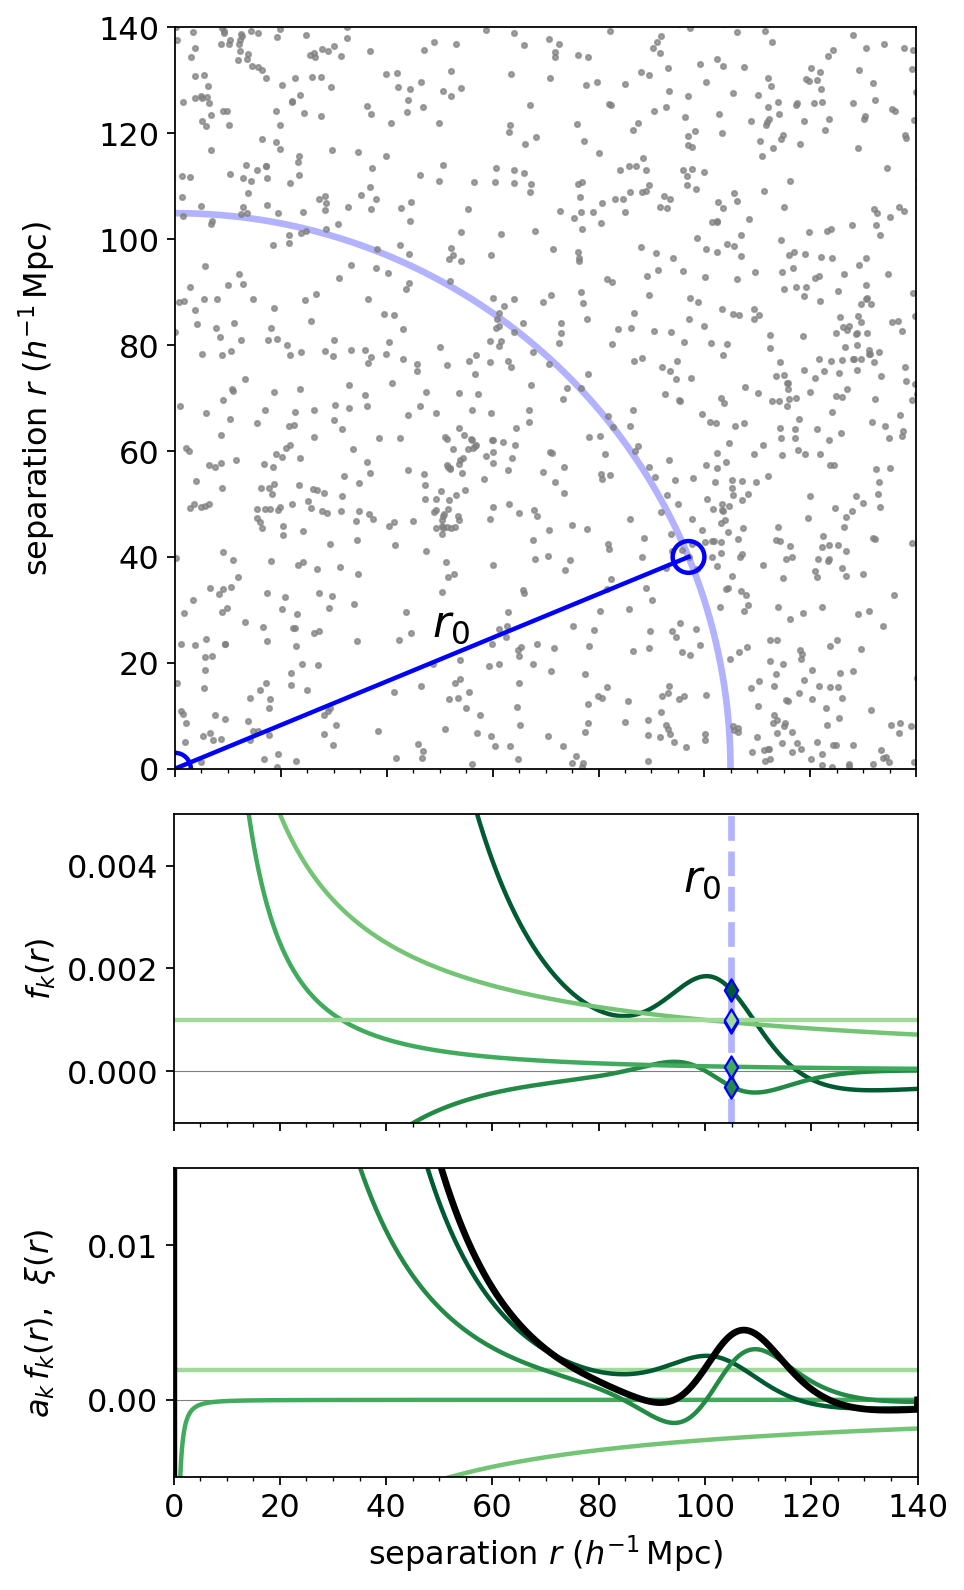

In [64]:
fig, axarr = plt.subplots(3,1, figsize=(6,12), sharex=True, gridspec_kw={'height_ratios': [2.4, 1, 1]})
plt.subplots_adjust(wspace=0.1, hspace=0.1)

data = [x, y, z]
bases = np.loadtxt(projfn)
rescale_by = np.ones(5)
rescale_by[4] = 25
    
rsep, rcolor = data_panel(axarr[0], data)
bases_panel(axarr[1], bases, bao_base_colors, rsep, rcolor,
            bases_ordered=[3,4,0,1,2], rescale_by=rescale_by, ylim=(-0.001, 0.005))
results_panel(axarr[2], bases, bao_base_colors, amps_ana, r_fine, xi_ana, ylim=(-0.005, 0.015))
fig.align_ylabels(axarr)

/Users/ksf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


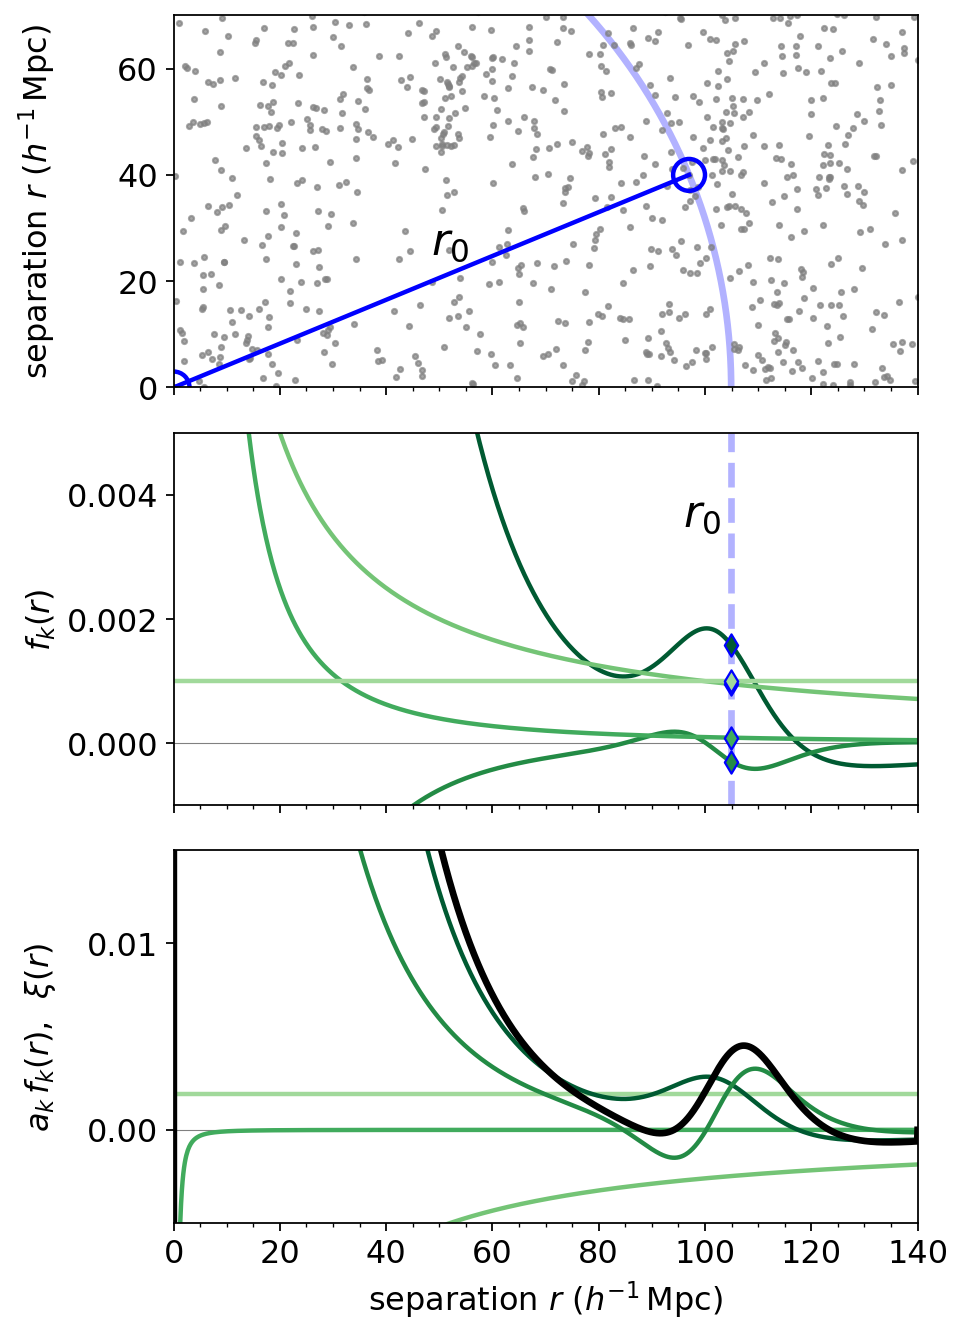

In [73]:
fig, axarr = plt.subplots(3,1, figsize=(6,10), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})
plt.subplots_adjust(wspace=0.1, hspace=0.12)

data = [x, y, z]
bases = np.loadtxt(projfn)
rescale_by = np.ones(5)
rescale_by[4] = 25
    
rsep, rcolor = data_panel(axarr[0], data, zslice=(0,400))
bases_panel(axarr[1], bases, bao_base_colors, rsep, rcolor,
            bases_ordered=[3,4,0,1,2], rescale_by=rescale_by, ylim=(-0.001, 0.005))
results_panel(axarr[2], bases, bao_base_colors, amps_ana, r_fine, xi_ana, ylim=(-0.005, 0.015))
fig.align_ylabels(axarr)